In [9]:
from keras.layers import SimpleRNN

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))   # This last layer only returns the last outputs.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [14]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 33s 197ms/step - loss: 0.6210 - acc: 0.6352 - val_loss: 0.4319 - val_acc: 0.8140
Epoch 2/10
157/157 [==============================] - 38s 240ms/step - loss: 0.3751 - acc: 0.8409 - val_loss: 0.4416 - val_acc: 0.7962
Epoch 3/10
157/157 [==============================] - 35s 225ms/step - loss: 0.2857 - acc: 0.8873 - val_loss: 0.4296 - val_acc: 0.8082
Epoch 4/10
157/157 [==============================] - 35s 224ms/step - loss: 0.2123 - acc: 0.9214 - val_loss: 0.3777 - val_acc: 0.8564
Epoch 5/10
157/157 [==============================] - 53s 339ms/step - loss: 0.1617 - acc: 0.9413 - val_loss: 0.4208 - val_acc: 0.8302
Epoch 6/10
157/157 [==============================] - 46s 292ms/step - loss: 0.1036 - acc: 0.9652 - val_loss: 0.5132 - val_acc: 0.8416
Epoch 7/10
157/157 [==============================] - 48s 308ms/step - loss: 0.0889 - acc: 0.9712 - val_loss: 0.5588 - val_acc: 0.7914
Epoch 8/10
157/157 [==============================] - 3

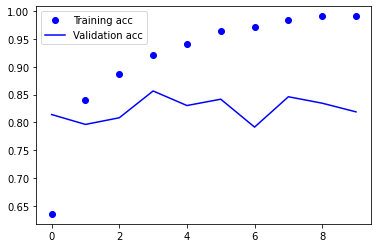

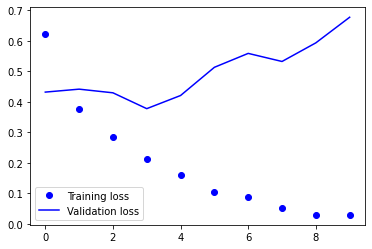

In [15]:
import matplotlib.pyplot as plt         

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [16]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 64s 391ms/step - loss: 0.5255 - acc: 0.7596 - val_loss: 0.3783 - val_acc: 0.8524
Epoch 2/10
157/157 [==============================] - 60s 383ms/step - loss: 0.3100 - acc: 0.8787 - val_loss: 0.3318 - val_acc: 0.8632
Epoch 3/10
157/157 [==============================] - 59s 377ms/step - loss: 0.2404 - acc: 0.9100 - val_loss: 0.3421 - val_acc: 0.8558
Epoch 4/10
157/157 [==============================] - 59s 378ms/step - loss: 0.2104 - acc: 0.9231 - val_loss: 0.3675 - val_acc: 0.8676
Epoch 5/10
157/157 [==============================] - 60s 379ms/step - loss: 0.1867 - acc: 0.9323 - val_loss: 0.5286 - val_acc: 0.8532
Epoch 6/10
157/157 [==============================] - 59s 374ms/step - loss: 0.1592 - acc: 0.9409 - val_loss: 0.5350 - val_acc: 0.8210
Epoch 7/10
157/157 [==============================] - 59s 378ms/step - loss: 0.1490 - acc: 0.9477 - val_loss: 0.3370 - val_acc: 0.8902
Epoch 8/10
157/157 [==============================] - 5

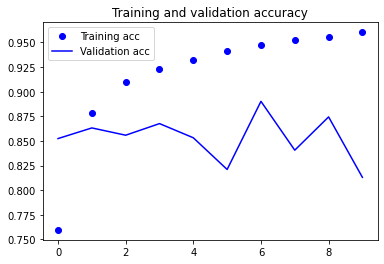

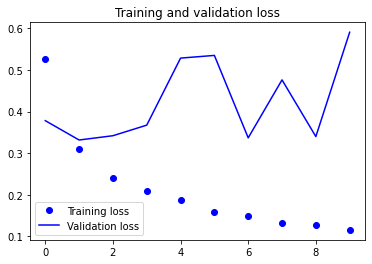

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()